# 查看FashionMNIST原始数据格式

In [22]:
import torch
import torchvision
import numpy as np
import matplotlib.pyplot as plt
from torchvision import datasets, transforms
from wangdao_deeplearning_train import EarlyStopping, ModelSaver,train_classification_model,plot_learning_curves
from wangdao_deeplearning_train import evaluate_classification_model as evaluate_model
# 加载Fashion MNIST数据集，张量就是和numpy数组一样
transform = transforms.Compose([])
train_dataset = datasets.FashionMNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.FashionMNIST(root='./data', train=False, download=True, transform=transform)
print(train_dataset[0])
train_dataset[0][0]

(<PIL.Image.Image image mode=L size=28x28 at 0x7E560A58BBD0>, 9)


# 加载数据并处理为tensor

In [23]:
# 加载Fashion MNIST数据集，张量就是和numpy数组一样

train_dataset = datasets.FashionMNIST(root='./data', train=True, download=True, transform=transforms.ToTensor())
test_dataset = datasets.FashionMNIST(root='./data', train=False, download=True, transform=transforms.ToTensor())


# 获取图像和标签
# 注意：由于使用了transform，图像已经被转换为张量且标准化
# 我们需要从dataset中提取原始图像用于显示
train_images = train_dataset.data.numpy()
train_labels = train_dataset.targets.numpy()
test_images = test_dataset.data.numpy()
test_labels = test_dataset.targets.numpy()

# 定义类别名称
class_names = ['T-shirt/top', '裤子', '套头衫', '连衣裙', '外套',
               '凉鞋', '衬衫', '运动鞋', '包', '短靴']

# 查看数据集基本信息
print(f"训练集形状: {train_images.shape}")
print(f"训练集标签数量: {len(train_labels)}")
print(f"测试集形状: {test_images.shape}")
print(f"测试集标签数量: {len(test_labels)}")

print(train_images[0])

train_labels[0:20]


训练集形状: (60000, 28, 28)
训练集标签数量: 60000
测试集形状: (10000, 28, 28)
测试集标签数量: 10000
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5, 0, 9, 5, 5, 7, 9, 1, 0, 6, 4])

In [24]:
#查看归一化后的效果
train_dataset[0]

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [25]:
train_dataset[0][0].shape

torch.Size([1, 28, 28])

In [26]:
train_dataset[0][0].squeeze().shape

torch.Size([28, 28])

# 把数据集划分为训练集55000和验证集5000，并给DataLoader

In [27]:
# 从训练集中划分出验证集
train_size = 55000
val_size = 5000
# 设置随机种子以确保每次得到相同的随机划分结果
generator = torch.Generator().manual_seed(42)
train_subset, val_subset = torch.utils.data.random_split(
    train_dataset,
    [train_size, val_size],
    generator=generator #设置随机种子，确保每次得到相同的随机划分结果
)

# 创建数据加载器
batch_size = 64
train_loader = torch.utils.data.DataLoader(
    train_subset,
    batch_size=batch_size,
    shuffle=True #打乱数据集，每次迭代时，数据集的顺序都会被打乱
)

val_loader = torch.utils.data.DataLoader(
    val_subset,
    batch_size=batch_size,
    shuffle=False
)

test_loader = torch.utils.data.DataLoader(
    test_dataset,
    batch_size=batch_size,
    shuffle=False
)

# 打印数据集大小信息
print(f"训练集大小: {len(train_subset)}")
print(f"验证集大小: {len(val_subset)}")
print(f"测试集大小: {len(test_dataset)}")
print(f"批次大小: {batch_size}")
print(f"训练批次数: {len(train_loader)}")


训练集大小: 55000
验证集大小: 5000
测试集大小: 10000
批次大小: 64
训练批次数: 860


In [28]:
64*860

55040

In [29]:
def calculate_mean_std(train_dataset):
    # 首先将所有图像数据堆叠为一个大张量
    all_images = torch.stack([img_tensor for img_tensor, _ in train_dataset])
    print(all_images.shape)
    # 计算通道维度上的均值和标准差
    # Fashion MNIST是灰度图像，只有一个通道
    # 对所有像素值计算均值和标准差
    mean = torch.mean(all_images)
    std = torch.std(all_images)

    print(f"训练数据集均值: {mean.item():.4f}")
    print(f"训练数据集标准差: {std.item():.4f}")

    # 检查数据集大小
    print(f"数据集中图像总数: {len(train_dataset)}")
calculate_mean_std(train_subset)

torch.Size([55000, 1, 28, 28])
训练数据集均值: 0.2856
训练数据集标准差: 0.3527
数据集中图像总数: 55000


# 搭建模型

In [30]:

#理解每个接口的方法，单独写例子
import torch.nn as nn
m=nn.BatchNorm1d(100) # 创建一个批量归一化层，输入特征维度为100
x=torch.randn(20,100) # 创建一个20行100列的随机张量
print(m(x).shape) # 打印批量归一化后的张量形状

torch.Size([20, 100])


In [31]:
class DepthwiseSeparableConv2d(nn.Module):
    """
    深度可分离卷积模块

    参数:
        in_channels: 输入通道数
        out_channels: 输出通道数
        kernel_size: 卷积核大小
        stride: 步长，默认为1
        padding: 填充，默认为0
    """
    def __init__(self, in_channels, out_channels, kernel_size, stride=1, padding=0):
        super(DepthwiseSeparableConv2d, self).__init__()

        # 深度卷积 - 每个输入通道使用一个卷积核
        self.depthwise = nn.Conv2d(
            in_channels=in_channels, # 输入通道数
            out_channels=in_channels, # 输出通道数
            kernel_size=kernel_size, # 卷积核大小
            stride=stride, # 步长
            padding=padding, # 填充
            groups=in_channels  # 分组卷积，每个输入通道单独卷积
        )

        # 逐点卷积 - 使用1x1卷积进行通道融合
        self.pointwise = nn.Conv2d(
            in_channels=in_channels,
            out_channels=out_channels,
            kernel_size=1,
            stride=1,
            padding=0
        )

    def forward(self, x):
        # 先进行深度卷积
        x = self.depthwise(x)
        # 再进行逐点卷积
        x = self.pointwise(x)
        return x

# 测试深度可分离卷积
input_tensor = torch.randn(1, 3, 28, 28)  # 批次大小为1，3个输入通道，28x28图像
conv = DepthwiseSeparableConv2d(in_channels=3, out_channels=16, kernel_size=3, padding=1)
output = conv(input_tensor)
print(f"输入形状: {input_tensor.shape}")
print(f"输出形状: {output.shape}")

# 比较参数数量
standard_conv = nn.Conv2d(in_channels=3, out_channels=16, kernel_size=3, padding=1)
print(f"标准卷积参数数量: {sum(p.numel() for p in standard_conv.parameters())}")
print(f"深度可分离卷积参数数量: {sum(p.numel() for p in conv.parameters())}")
print(f"参数减少比例: {1 - sum(p.numel() for p in conv.parameters()) / sum(p.numel() for p in standard_conv.parameters()):.2%}")


输入形状: torch.Size([1, 3, 28, 28])
输出形状: torch.Size([1, 16, 28, 28])
标准卷积参数数量: 448
深度可分离卷积参数数量: 94
参数减少比例: 79.02%


In [32]:
import torch.nn as nn
import torch.nn.functional as F

class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        #normalize
        self.transform = nn.Sequential(
            transforms.Normalize([0.2856], [0.3527])
        )

        # 第一组卷积层 - 32个卷积核
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, padding=1) # 输入通道数，输出通道数代表的是卷积核的个数
        self.conv2 = nn.Conv2d(32, 32, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)

        # 第二组卷积层 - 64个卷积核
        self.conv3 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.conv4 = nn.Conv2d(64, 64, kernel_size=3, padding=1)


        # 第三组卷积层 - 128个卷积核
        self.conv5 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        self.conv6 = nn.Conv2d(128, 128, kernel_size=3, padding=1)


        # 计算全连接层的输入特征数
        # 经过3次池化，图像尺寸从28x28变为3x3x128
        self.fc1 = nn.Linear(128 * 3 * 3, 256)
        self.fc2 = nn.Linear(256, 10)

        # 初始化权重
        self.init_weights()

    def init_weights(self):
        """使用 xavier 均匀分布来初始化卷积层和全连接层的权重"""
        for m in self.modules():
            if isinstance(m, nn.Conv2d) or isinstance(m, nn.Linear):
                nn.init.xavier_uniform_(m.weight)
                if m.bias is not None:
                    nn.init.zeros_(m.bias)

    def forward(self, x):
        # x.shape [batch size, 1, 28, 28]

        # 第一组卷积层
        x = F.selu(self.conv1(x))
        # print(f"conv1后的形状: {x.shape}")
        x = F.selu(self.conv2(x))
        # print(f"conv2后的形状: {x.shape}")
        x = self.pool(x)
        # print(f"pool1后的形状: {x.shape}")

        # 第二组卷积层
        x = F.selu(self.conv3(x))
        # print(f"conv3后的形状: {x.shape}")
        x = F.selu(self.conv4(x))
        # print(f"conv4后的形状: {x.shape}")
        x = self.pool(x)
        # print(f"pool2后的形状: {x.shape}")

        # 第三组卷积层
        x = F.selu(self.conv5(x))
        # print(f"conv5后的形状: {x.shape}")
        x = F.selu(self.conv6(x))
        # print(f"conv6后的形状: {x.shape}")
        x = self.pool(x)
        # print(f"pool3后的形状: {x.shape}")

        # 展平
        x = x.view(x.size(0), -1)
        # print(f"展平后的形状: {x.shape}")

        # 全连接层
        x = F.selu(self.fc1(x))
        # print(f"fc1后的形状: {x.shape}")
        x = self.fc2(x)
        # print(f"fc2后的形状: {x.shape}")

        return x

In [33]:
# 实例化模型
model = NeuralNetwork()

# 从train_loader获取第一个批次的数据
dataiter = iter(train_loader)
images, labels = next(dataiter)

# 查看批次数据的形状
print("批次图像形状:", images.shape)
print("批次标签形状:", labels.shape)


print('-'*100)
# 进行前向传播
with torch.no_grad():  # 不需要计算梯度
    outputs = model(images)


print(outputs.shape)




批次图像形状: torch.Size([64, 1, 28, 28])
批次标签形状: torch.Size([64])
----------------------------------------------------------------------------------------------------
torch.Size([64, 10])


In [34]:
# 计算模型的总参数量
# 统计需要求梯度的参数总量
total_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
print(f"需要求梯度的参数总量: {total_params}")

# 统计所有参数总量
all_params = sum(p.numel() for p in model.parameters())
print(f"模型总参数量: {all_params}")

# 查看每层参数量明细
print("\n各层参数量明细:")
for name, param in model.named_parameters():
    print(f"{name}: {param.numel()} 参数")

需要求梯度的参数总量: 584170
模型总参数量: 584170

各层参数量明细:
conv1.weight: 288 参数
conv1.bias: 32 参数
conv2.weight: 9216 参数
conv2.bias: 32 参数
conv3.weight: 18432 参数
conv3.bias: 64 参数
conv4.weight: 36864 参数
conv4.bias: 64 参数
conv5.weight: 73728 参数
conv5.bias: 128 参数
conv6.weight: 147456 参数
conv6.bias: 128 参数
fc1.weight: 294912 参数
fc1.bias: 256 参数
fc2.weight: 2560 参数
fc2.bias: 10 参数


# 各层参数量明细
conv1.weight: 288 参数
conv1.bias: 32 参数
conv2.weight: 9216 参数
conv2.bias: 32 参数
conv3.weight: 18432 参数
conv3.bias: 64 参数
conv4.weight: 36864 参数
conv4.bias: 64 参数
conv5.weight: 73728 参数
conv5.bias: 128 参数
conv6.weight: 147456 参数
conv6.bias: 128 参数
fc1.weight: 294912 参数
fc1.bias: 256 参数
fc2.weight: 2560 参数
fc2.bias: 10 参数

In [35]:
model.state_dict()

OrderedDict([('conv1.weight',
              tensor([[[[-0.0676, -0.1247, -0.1340],
                        [ 0.1242, -0.0004,  0.0109],
                        [-0.0519,  0.0694, -0.0085]]],
              
              
                      [[[ 0.1334, -0.0192,  0.0198],
                        [-0.1316, -0.0424,  0.0231],
                        [ 0.0007, -0.0579,  0.0947]]],
              
              
                      [[[-0.1140, -0.0930, -0.0943],
                        [ 0.0975,  0.0265,  0.0444],
                        [-0.0208, -0.0886,  0.0592]]],
              
              
                      [[[ 0.1242, -0.0282,  0.0518],
                        [-0.0887,  0.0936, -0.1225],
                        [-0.0305, -0.0315, -0.0276]]],
              
              
                      [[[ 0.0864,  0.0754, -0.0920],
                        [ 0.0042, -0.0673, -0.0622],
                        [-0.0675,  0.0824, -0.0891]]],
              
              
               

# 设置交叉熵损失函数，SGD优化器

In [36]:
model = NeuralNetwork()
# 定义损失函数和优化器
loss_fn = nn.CrossEntropyLoss()  # 交叉熵损失函数，适用于多分类问题，里边会做softmax，还有会把0-9标签转换成one-hot编码

print("损失函数:", loss_fn)


损失函数: CrossEntropyLoss()


In [37]:
model = NeuralNetwork()

optimizer = torch.optim.SGD(model.parameters(), lr=0.001, momentum=0.9)  # SGD优化器，学习率为0.01，动量为0.9

In [38]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(f"使用设备: {device}")
model = model.to(device) #将模型移动到GPU
early_stopping=EarlyStopping(patience=10, delta=0.001)
model_saver=ModelSaver(save_dir='model_weights', save_best_only=True)


model, history = train_classification_model(model, train_loader, val_loader, loss_fn, optimizer, device, num_epochs=50,early_stopping=early_stopping, model_saver=model_saver, tensorboard_logger=None,eval_step=50)

使用设备: cuda:0
训练开始，共43000步


  0%|          | 0/43000 [00:00<?, ?it/s]

早停触发! 最佳验证准确率(如果是回归，这里是损失): 89.1000
早停: 在2700 步


In [39]:
history['train'][-100:-1]

[{'loss': 0.3610747754573822, 'acc': 82.8125, 'step': 2601},
 {'loss': 0.22348766028881073, 'acc': 92.1875, 'step': 2602},
 {'loss': 0.23459966480731964, 'acc': 93.75, 'step': 2603},
 {'loss': 0.2697799801826477, 'acc': 90.625, 'step': 2604},
 {'loss': 0.23870031535625458, 'acc': 93.75, 'step': 2605},
 {'loss': 0.21670977771282196, 'acc': 90.625, 'step': 2606},
 {'loss': 0.18847551941871643, 'acc': 92.1875, 'step': 2607},
 {'loss': 0.3729979693889618, 'acc': 87.5, 'step': 2608},
 {'loss': 0.20983612537384033, 'acc': 89.0625, 'step': 2609},
 {'loss': 0.17507584393024445, 'acc': 92.1875, 'step': 2610},
 {'loss': 0.41100022196769714, 'acc': 87.5, 'step': 2611},
 {'loss': 0.38758888840675354, 'acc': 85.9375, 'step': 2612},
 {'loss': 0.32576099038124084, 'acc': 92.1875, 'step': 2613},
 {'loss': 0.32790255546569824, 'acc': 87.5, 'step': 2614},
 {'loss': 0.19891156256198883, 'acc': 92.1875, 'step': 2615},
 {'loss': 0.24520941078662872, 'acc': 89.0625, 'step': 2616},
 {'loss': 0.20378638803958

# 绘制损失曲线和准确率曲线

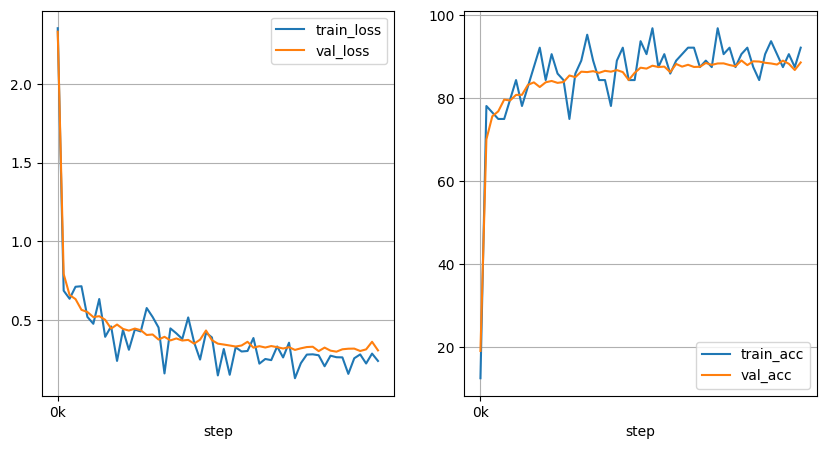

In [40]:
plot_learning_curves(history, sample_step=50)  #横坐标是 steps

In [41]:
# 在测试集上评估模型
test_accuracy = evaluate_model(model, test_loader, device, loss_fn)
test_accuracy


(88.19, 0.3151040073633194)